# Q5

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [2]:
image = cv2.imread(r'Q5_image/1.jpg',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(output_image)

(-0.5, 275.5, 377.5, -0.5)

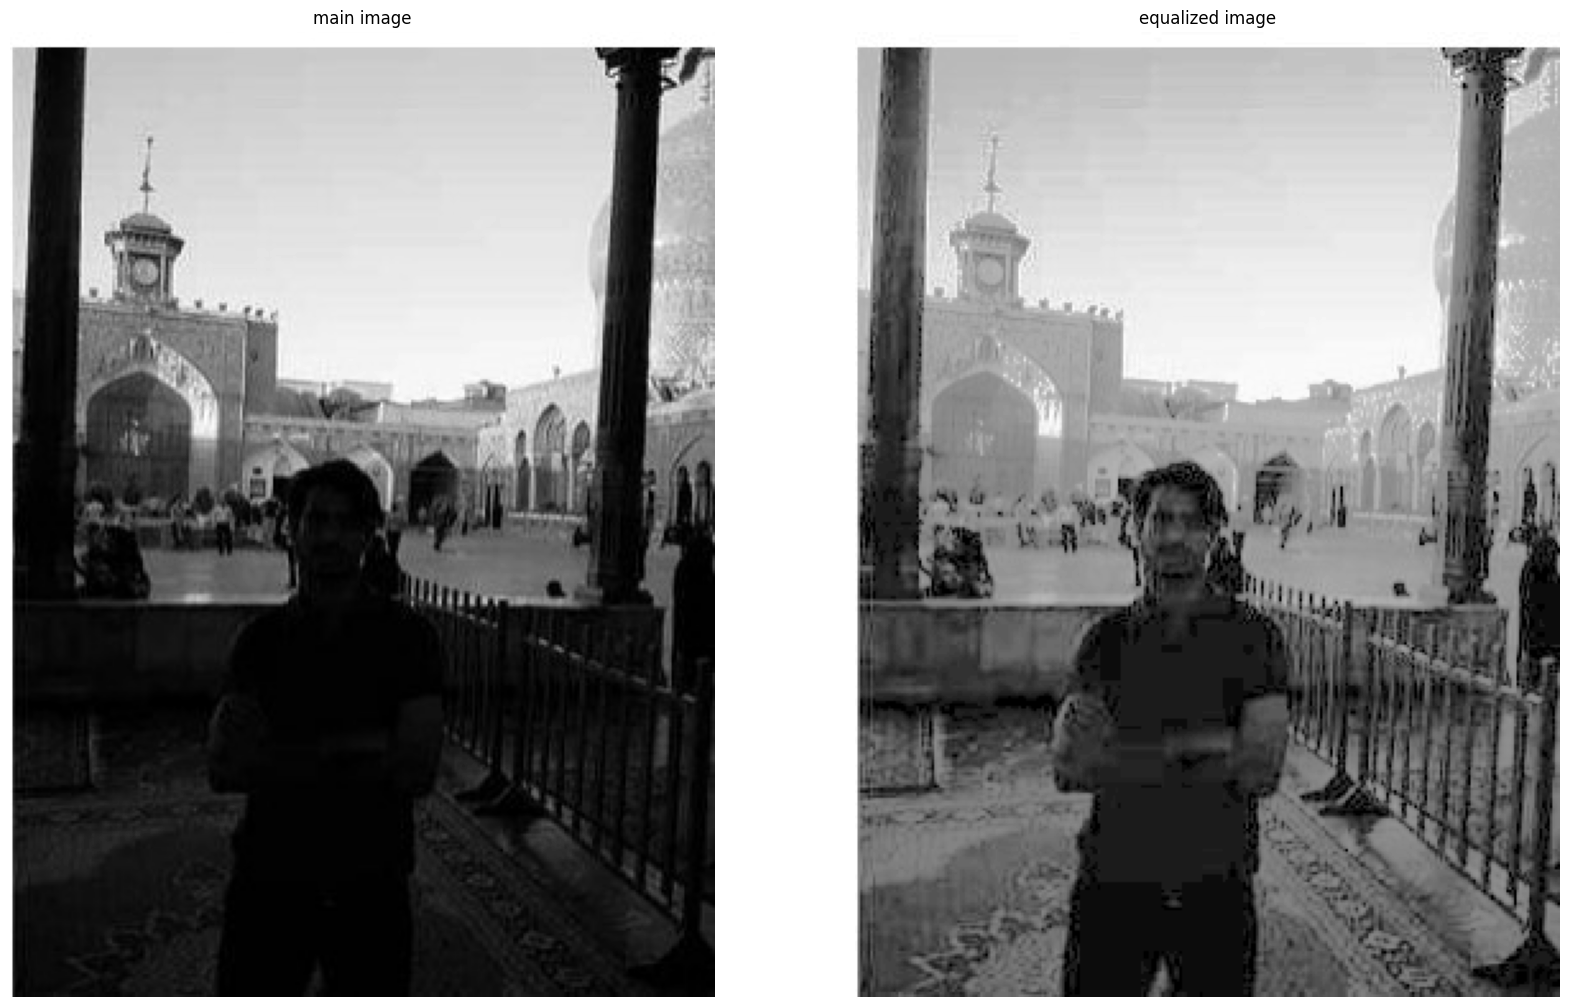

In [3]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [4]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()
  
  #######################
  #    your code here   #
  #######################
  num_rows = np.shape(output_image)[0]
  num_columns = np.shape(output_image)[1]
  for i in range(0,num_rows,gridSize):
      for j in range(0,num_columns,gridSize):
        #clip image then equalization                    
        output_image[i:i+gridSize, j:j+gridSize]=cv2.equalizeHist(output_image[i:i+gridSize, j:j+gridSize])
  
  return output_image

(-0.5, 275.5, 377.5, -0.5)

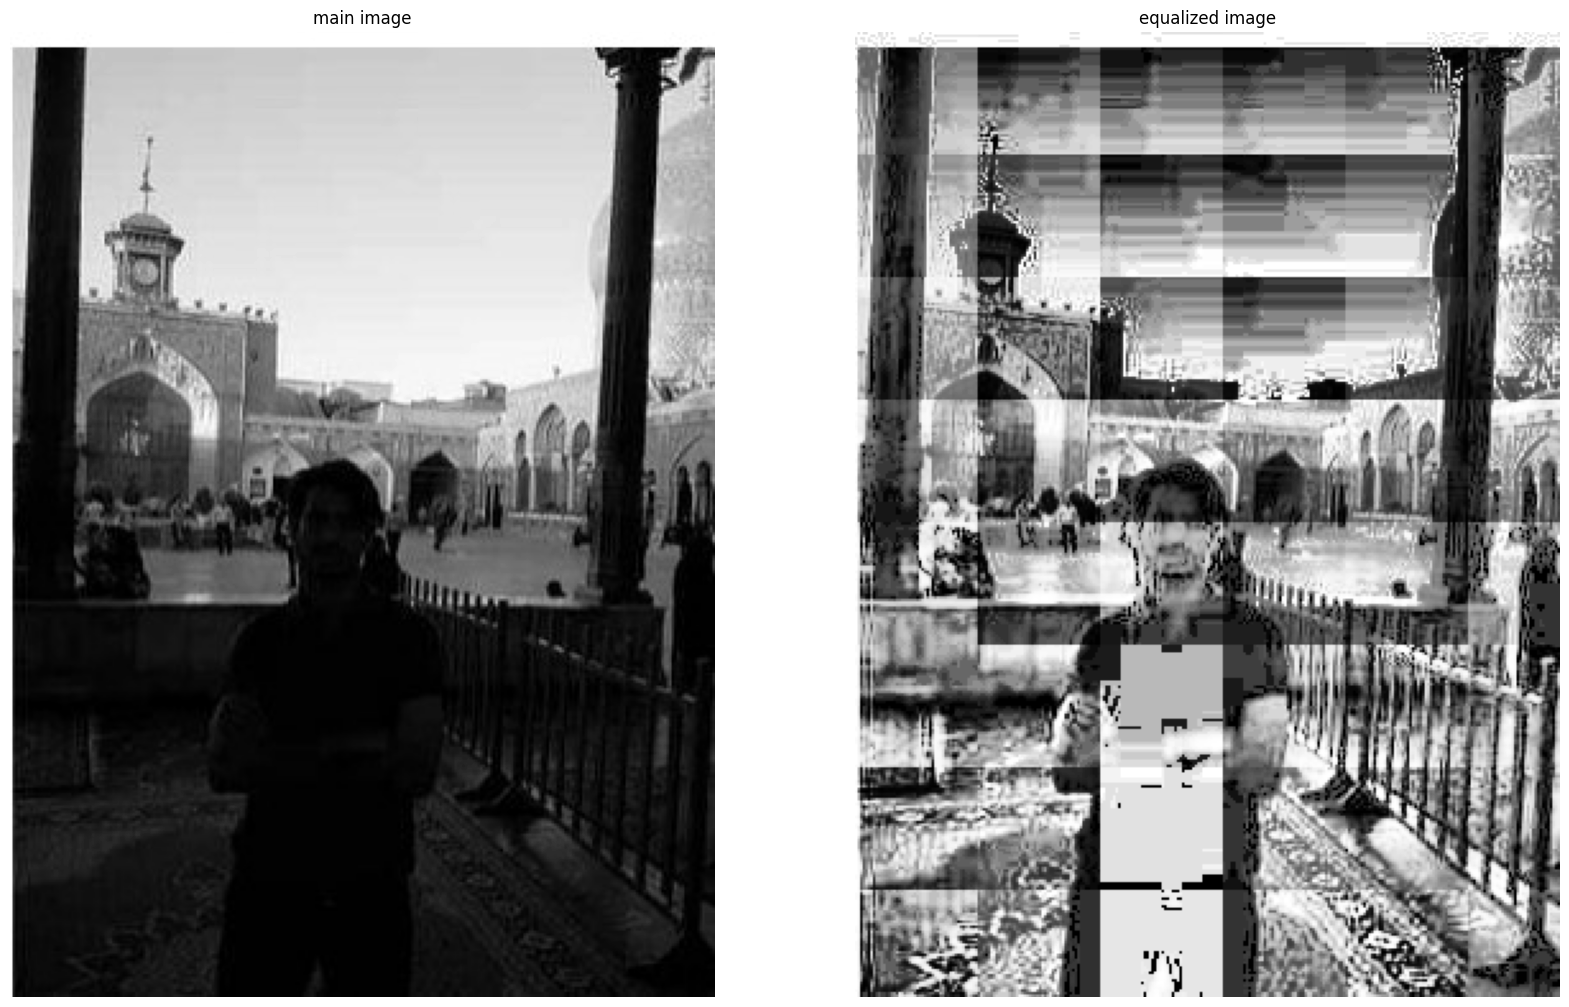

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [6]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    output2=image.copy()
    num_rows = np.shape(output)[0]
    num_columns = np.shape(output)[1]
    # We calculate how much padding we should add
    paddingx=int(gridSize[0]/2)
    paddingy=int(gridSize[1]/2)
    #add padding
    output=cv2.copyMakeBorder(output,paddingx,paddingx,paddingx,paddingx,cv2.BORDER_CONSTANT,None,value = 0)
    output2=cv2.copyMakeBorder(output,paddingx,paddingx,paddingx,paddingx,cv2.BORDER_CONSTANT,None,value = 0)
    for i in range(paddingx,num_rows+paddingx):
      for j in range(paddingy,num_columns+paddingx):
        # calculate value of each pixels
        output2[i,j]=cv2.equalizeHist(output[i-paddingx:i+paddingx, j-paddingy:j+paddingy])[paddingx,paddingy]
    output=output2[paddingx:num_rows+paddingx,paddingy:num_columns+paddingy]
    #######################
    #    your code here   #
    #######################

    return output

(-0.5, 275.5, 377.5, -0.5)

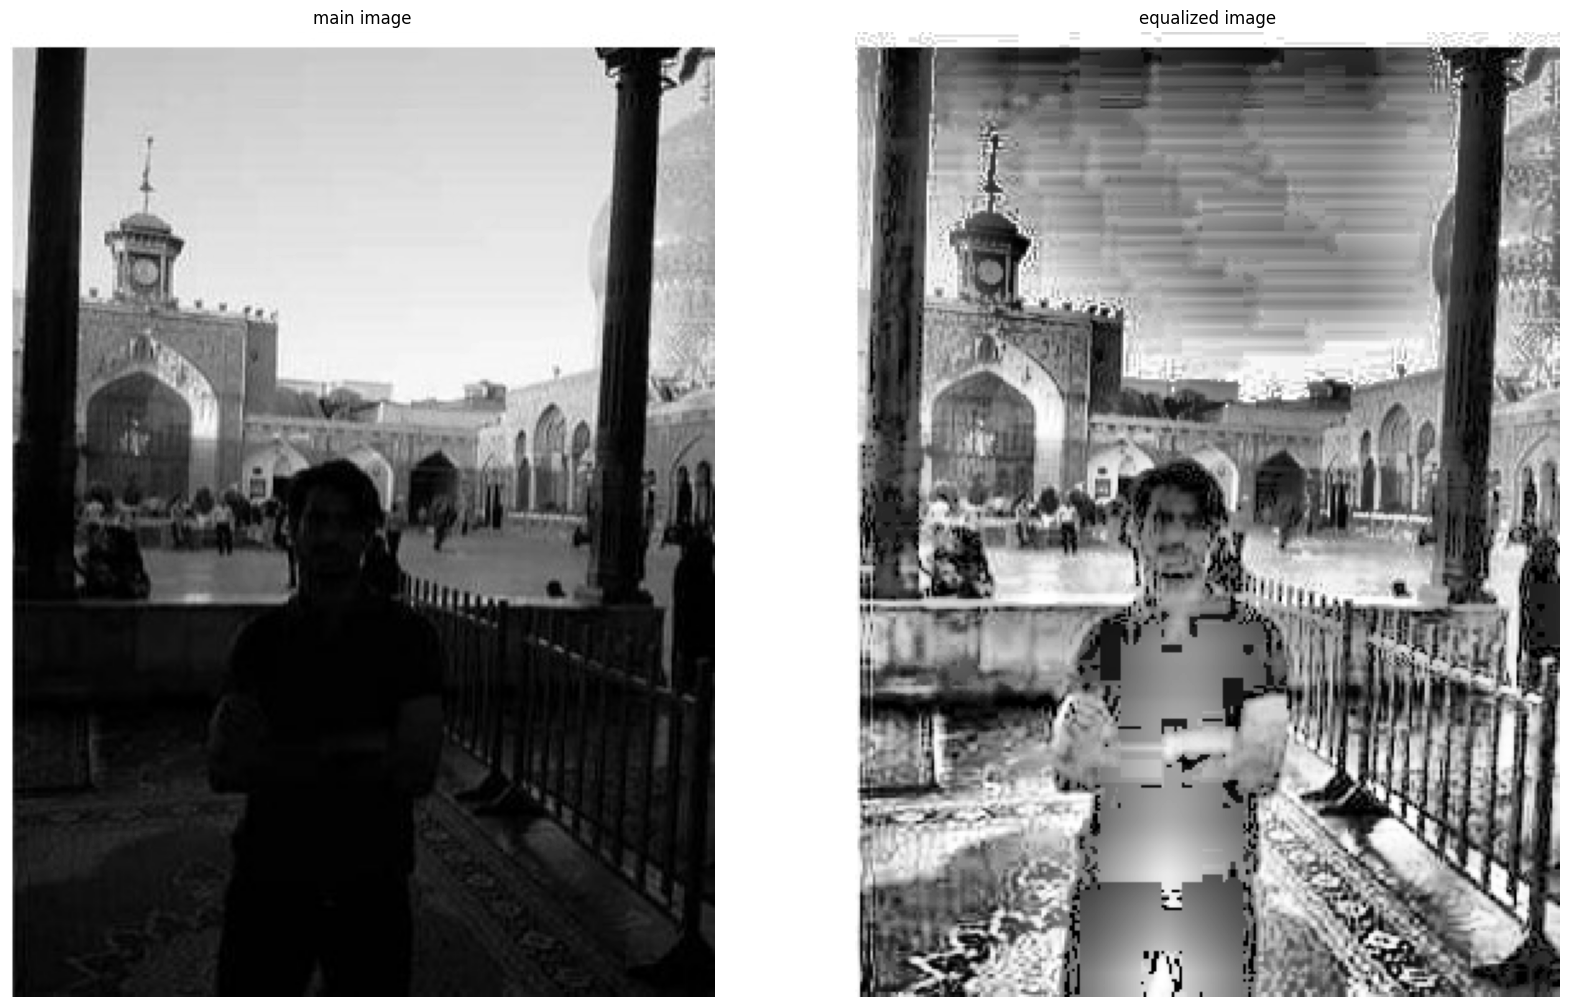

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [8]:
def clahehistogram(img,clip_limit):
  hist=cv2.calcHist([img],[0],None,[256],[0,256])
  hist2=hist.copy()
  hist -= clip_limit
  hist = np.maximum(hist, 0)
  hist2[hist2>clip_limit]=clip_limit
  # sum of Values that exceed the limit
  limit = hist.sum()
  # broadcast to histogram
  hist2+=int(limit/256)
  return hist2  

def equalize(img,hist,x,y):
  #just find value of this pixel    
  val=img[x,y]    
  eqxy=((np.sum(hist[0:val+1]))/(img.shape[0]*img.shape[1]))*255
  if eqxy>255:
    eqxy=255
  return eqxy      

def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''

    #######################
    #    your code here   #
    #######################
    output = image.copy()
    output2=image.copy()
    num_rows = np.shape(output)[0]
    num_columns = np.shape(output)[1]
    paddingx=int(gridSize[0]/2)
    paddingy=int(gridSize[1]/2)
    output=cv2.copyMakeBorder(output,paddingx,paddingx,paddingx,paddingx,cv2.BORDER_CONSTANT,None,value = 0)
    output2=cv2.copyMakeBorder(output,paddingx,paddingx,paddingx,paddingx,cv2.BORDER_CONSTANT,None,value = 0)
    for i in range(paddingx,num_rows+paddingx):
      for j in range(paddingy,num_columns+paddingx):
        hist=clahehistogram(output[i-paddingx:i+paddingx, j-paddingy:j+paddingy],clip_limit)
        # cv2.calcHist([output[i-paddingx:i+paddingx, j-paddingy:j+paddingy]],[0],None,[256],[0,256])                    
        output2[i,j]=equalize(output[i-paddingx:i+paddingx, j-paddingy:j+paddingy],hist,paddingx,paddingy)
    output=output2[paddingx:num_rows+paddingx,paddingy:num_columns+paddingy]
    
    
    return output

(-0.5, 275.5, 377.5, -0.5)

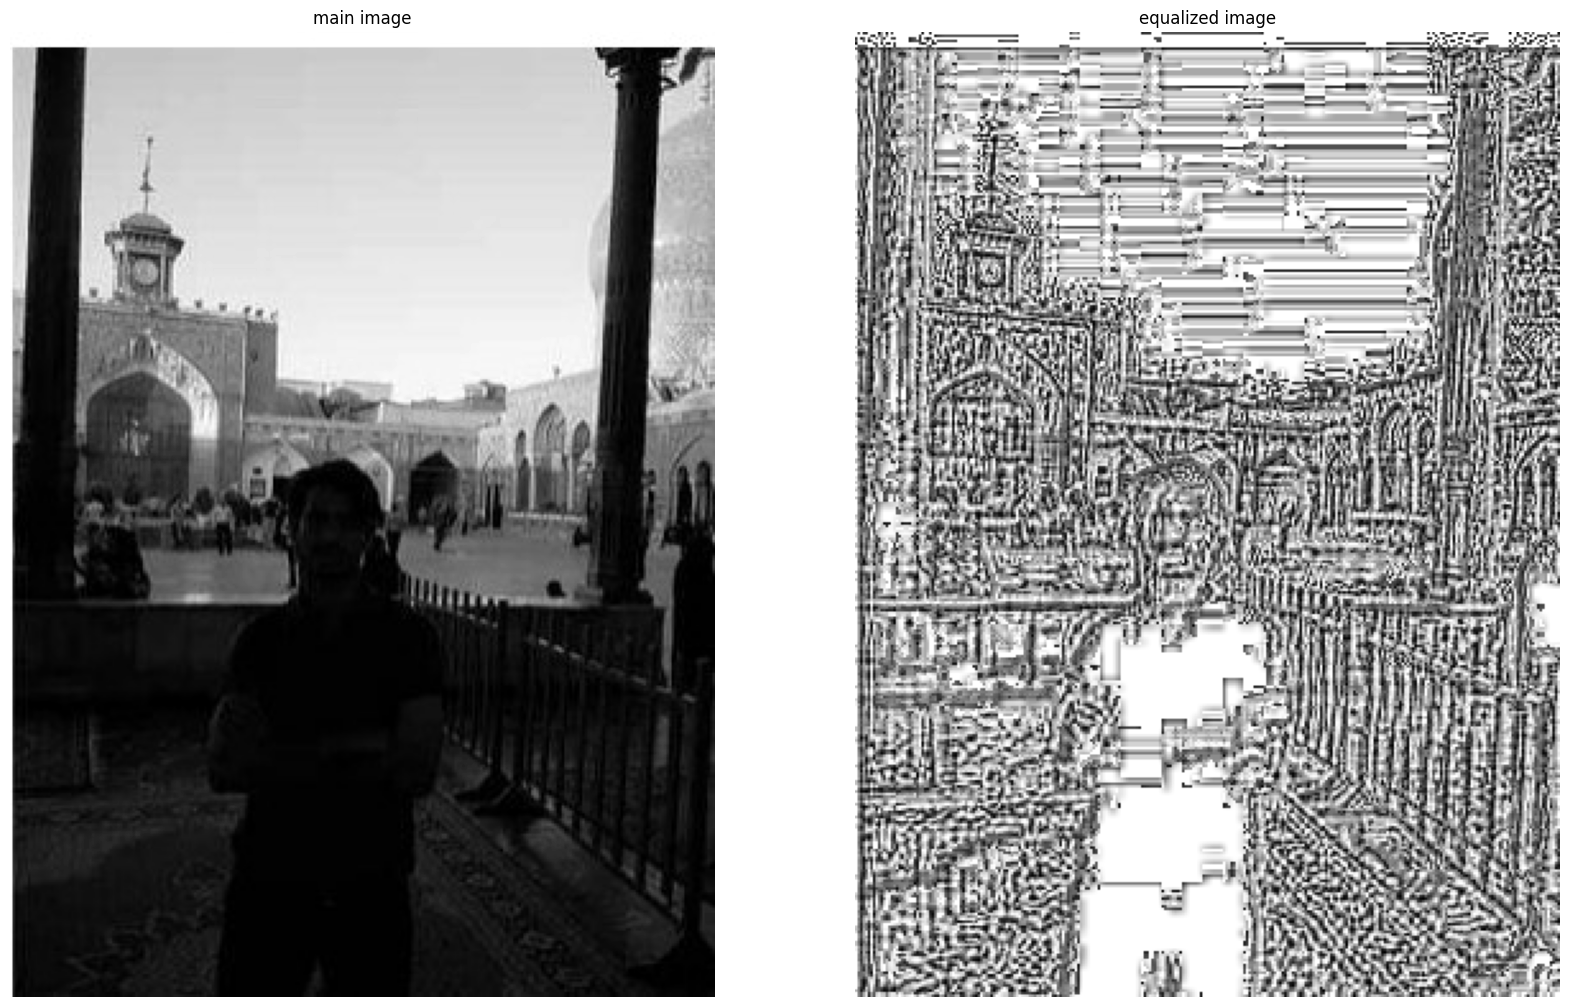

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
# output_image = CLAHE(image,(16,16), 4)

clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16))

# Apply CLAHE on the image
clahe_image = clahe.apply(image)
plt.imshow(clahe_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')